In [1]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from langchain_openai import ChatOpenAI

from langchain_docling.picture_description import PictureDescriptionLangChainOptions

In [2]:
DOC_SOURCE = "https://arxiv.org/pdf/2501.17887"

In [3]:
MODEL_ID = "granite-vision-3.2-2b"
llm = ChatOpenAI(model=MODEL_ID, base_url="http://localhost:1234/v1", api_key="none")

In [4]:
pipeline_options = PdfPipelineOptions(allow_external_plugins=True)
pipeline_options.do_picture_description = True
pipeline_options.picture_description_options = PictureDescriptionLangChainOptions(
    llm=llm,
    prompt="Describe the image in three sentences. Be consise and accurate.",
    provenance=MODEL_ID,
)
pipeline_options.images_scale = 2.0
pipeline_options.generate_picture_images = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)
doc = converter.convert(DOC_SOURCE).document

2025-11-14 15:39:29,627 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-11-14 15:39:29,646 - INFO - Going to convert document batch...
2025-11-14 15:39:29,646 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 83ca52768efb1e8b55a535d6e9c33377
2025-11-14 15:39:29,652 - INFO - Loading plugin 'docling_defaults'
2025-11-14 15:39:29,653 - INFO - Loading plugin 'langchain_docling'
2025-11-14 15:39:29,653 - INFO - Registered picture descriptions: ['vlm', 'api', 'langchain']
2025-11-14 15:39:29,658 - INFO - Loading plugin 'docling_defaults'
2025-11-14 15:39:29,660 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-11-14 15:39:29,955 - INFO - Auto OCR model selected ocrmac.
2025-11-14 15:39:29,959 - INFO - Accelerator device: 'mps'
2025-11-14 15:39:30,874 - INFO - Accelerator device: 'mps'
2025-11-14 15:39:31,096 - INFO - Processing document 2501.17887v1.pdf
2025-11-14 15:39:34,318 - INFO - HTTP Request: POS

2025-11-14 15:39:58,572 - WARNING - Migrating deprecated `annotations` to `meta`; this will be removed in the future. Note that only the first available instance of each annotation type will be migrated.
2025-11-14 15:39:58,572 - WARNING - Migrating deprecated `annotations` to `meta`; this will be removed in the future. Note that only the first available instance of each annotation type will be migrated.
2025-11-14 15:39:58,573 - WARNING - Migrating deprecated `annotations` to `meta`; this will be removed in the future. Note that only the first available instance of each annotation type will be migrated.
2025-11-14 15:39:58,573 - WARNING - Migrating deprecated `annotations` to `meta`; this will be removed in the future. Note that only the first available instance of each annotation type will be migrated.
2025-11-14 15:39:58,574 - WARNING - Migrating deprecated `annotations` to `meta`; this will be removed in the future. Note that only the first available instance of each annotation typ


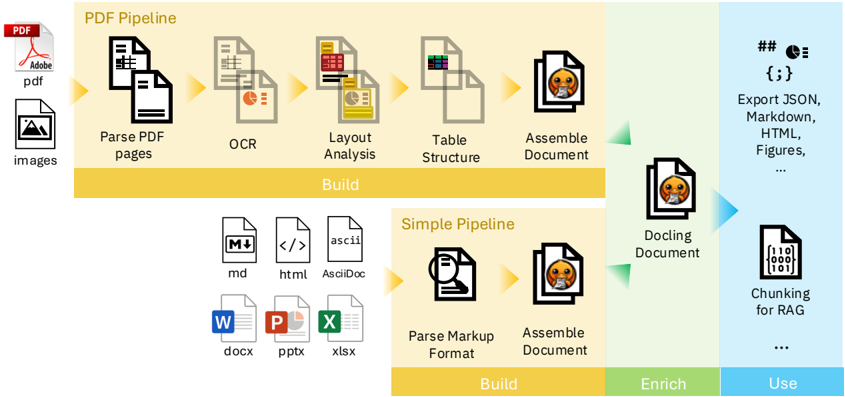
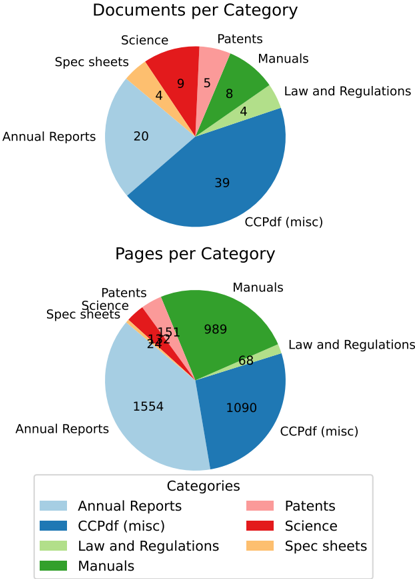
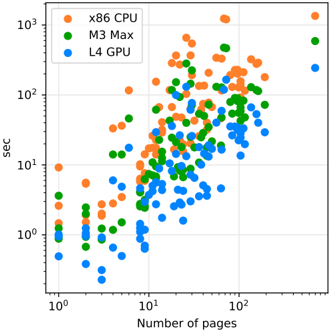
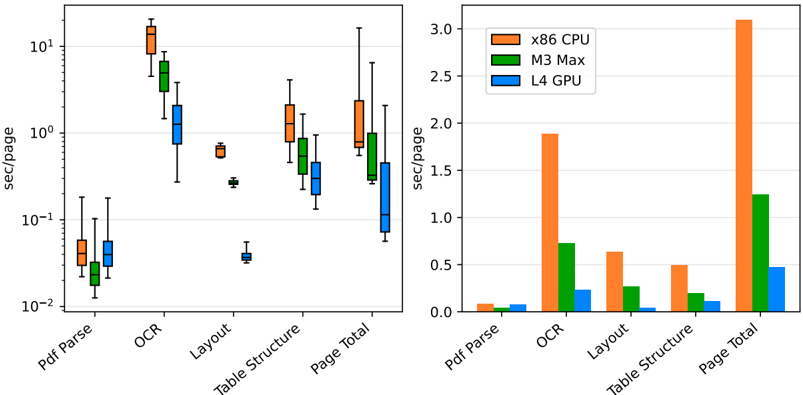
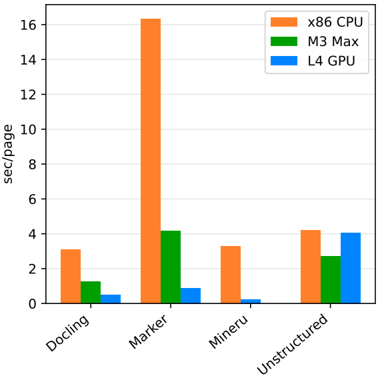

In [5]:
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in doc.pictures[:5]:

    pic = pic.model_validate(
        pic
    )  # workaround until this is fixed: https://github.com/docling-project/docling/issues/2632

    if pic.meta and pic.meta.description:
        html_part = (
            f"<h3>Picture <code>{pic.self_ref}</code></h3>"
            f'<img src="{pic.image.uri!s}" /><br />'
            f"<h4>Caption</h4>{pic.caption_text(doc=doc)}<br />"
            f"<h4>Metadata ({pic.meta.description.created_by})</h4>{pic.meta.description.text}<br />\n"
        )
        html_buffer.append(html_part)
display.HTML("<hr />".join(html_buffer))